# Appendix VII.

## t-SNE algorithm for raw data  EURO/USD 
## Visualisation of multidimensional data
## t-SNE algorithm (t-distributed Stochastic Neighbor Embedding)

3.png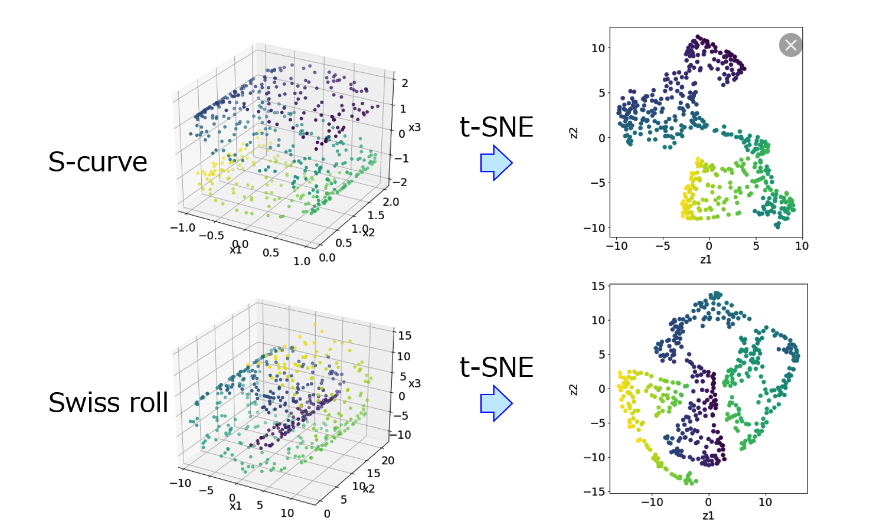

In [1]:
# Uses the compactness hypothesis: similar points of d-dimensional space are stacked together
# We transforme the image(data) from the d-dimensional space into 2-dimensional (less often into 3-dimensional) space
# It means that we transforme the matrix [number of rows]*d[number of columns] to the matrix [number of rows]*[2]

### Dataset

In [1]:
import numpy as np                  
import pandas as pd                 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# FOREX EURUSD: с 01.01.2019 по 30.06.2019

#data = pd.read_csv('/Users/vital/Python_Code/PhD_Code/2019 July/Ticks/Dukastcopy/EURUSD_ticks_2019-6.csv', sep=';')
data = pd.read_csv('2019/EURUSD_ticks_2019-6.csv', sep=';')

print(data.head(n=10)) 
print(data[-5:]) 

                Time (UTC)      Ask      Bid  AskVolume  BidVolume
0  2019.01.01 22:02:37.254  1.14682  1.14598       0.75       3.75
1  2019.01.01 22:02:38.590  1.14682  1.14599       0.75       2.25
2  2019.01.01 22:02:39.138  1.14684  1.14599       0.75       3.75
3  2019.01.01 22:02:55.787  1.14684  1.14598       0.75       3.75
4  2019.01.01 22:03:02.060  1.14684  1.14598       0.75       3.75
5  2019.01.01 22:03:12.290  1.14684  1.14599       0.75       3.00
6  2019.01.01 22:03:16.253  1.14684  1.14599       0.75       3.00
7  2019.01.01 22:03:58.115  1.14691  1.14607       1.12       0.75
8  2019.01.01 22:03:59.146  1.14678  1.14607       0.75       0.75
9  2019.01.01 22:04:00.208  1.14684  1.14607       0.75       0.75
                       Time (UTC)      Ask      Bid  AskVolume  BidVolume
16680590  2019.06.30 23:58:52.782  1.13606  1.13603       2.25       1.25
16680591  2019.06.30 23:58:53.478  1.13605  1.13604       1.00       1.00
16680592  2019.06.30 23:58:56.478  1.1360

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680595 entries, 0 to 16680594
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Time (UTC)  object 
 1   Ask         float64
 2   Bid         float64
 3   AskVolume   float64
 4   BidVolume   float64
dtypes: float64(4), object(1)
memory usage: 636.3+ MB


In [6]:
#  NaN ?
data.index[data.isnull().all(1)]

Int64Index([], dtype='int64')

In [7]:
# no NaN

In [8]:
# time transforming
data['DateT'] = pd.to_datetime(data['Time (UTC)'])

data = data.drop(['Time (UTC)'],axis=1) 

print(data.dtypes)
print(data.head(n=5))

Ask                 float64
Bid                 float64
AskVolume           float64
BidVolume           float64
DateT        datetime64[ns]
dtype: object
       Ask      Bid  AskVolume  BidVolume                   DateT
0  1.14682  1.14598       0.75       3.75 2019-01-01 22:02:37.254
1  1.14682  1.14599       0.75       2.25 2019-01-01 22:02:38.590
2  1.14684  1.14599       0.75       3.75 2019-01-01 22:02:39.138
3  1.14684  1.14598       0.75       3.75 2019-01-01 22:02:55.787
4  1.14684  1.14598       0.75       3.75 2019-01-01 22:03:02.060


In [9]:
# reducing size
data['Ask']       = pd.to_numeric(data['Ask'],downcast='float')
data['Bid']       = pd.to_numeric(data['Bid'],downcast='float')
data['AskVolume'] = pd.to_numeric(data['AskVolume'],downcast='float')
data['BidVolume'] = pd.to_numeric(data['BidVolume'],downcast='float')

data['DateT'] = pd.to_numeric(data['DateT'],downcast='integer')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680595 entries, 0 to 16680594
Data columns (total 5 columns):
Ask          float32
Bid          float32
AskVolume    float32
BidVolume    float32
DateT        int64
dtypes: float32(4), int64(1)
memory usage: 381.8 MB


In [10]:
print(data.head(n=6)) 
print(data.tail(n=6)) 

       Ask      Bid  AskVolume  BidVolume                DateT
0  1.14682  1.14598       0.75       3.75  1546380157254000000
1  1.14682  1.14599       0.75       2.25  1546380158590000000
2  1.14684  1.14599       0.75       3.75  1546380159138000000
3  1.14684  1.14598       0.75       3.75  1546380175787000000
4  1.14684  1.14598       0.75       3.75  1546380182060000000
5  1.14684  1.14599       0.75       3.00  1546380192290000000
              Ask      Bid  AskVolume  BidVolume                DateT
16680589  1.13605  1.13603       1.00       3.75  1561939131293000000
16680590  1.13606  1.13603       2.25       1.25  1561939132782000000
16680591  1.13605  1.13604       1.00       1.00  1561939133478000000
16680592  1.13606  1.13603       1.50       1.25  1561939136478000000
16680593  1.13605  1.13603       1.00       1.25  1561939138372000000
16680594  1.13605  1.13602       1.50       1.50  1561939139343000000


## t-SNE

### Raw data: Price, Volume, Time

In [11]:
from sklearn.manifold import TSNE

In [12]:
# First 1000 rows
N1 = 1000
N2 = len(data)
indexes_to_drop = np.array(range(N1,N2))
indexes_to_keep = set(range(data.shape[0])) - set(indexes_to_drop)

data2 = data.take(list(indexes_to_keep))

data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
Ask          1000 non-null float32
Bid          1000 non-null float32
AskVolume    1000 non-null float32
BidVolume    1000 non-null float32
DateT        1000 non-null int64
dtypes: float32(4), int64(1)
memory usage: 31.2 KB


In [13]:
tsne_1000 = TSNE(random_state=0)
# random_state - randomness control parameter, depending on it there will be different pictures
# default output dimension n_components = 2(plane)

In [14]:
tsne_1000?

In [15]:
# training

In [16]:
%%time
tsne_1000.fit(data2)

Wall time: 7.81 s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

In [17]:
tsne_1000.embedding_.shape  # dimentions are 2 !

(1000, 2)

In [18]:
# this is a matrix with TWO features, which is the result of converting multidimensional space into two-dimensional

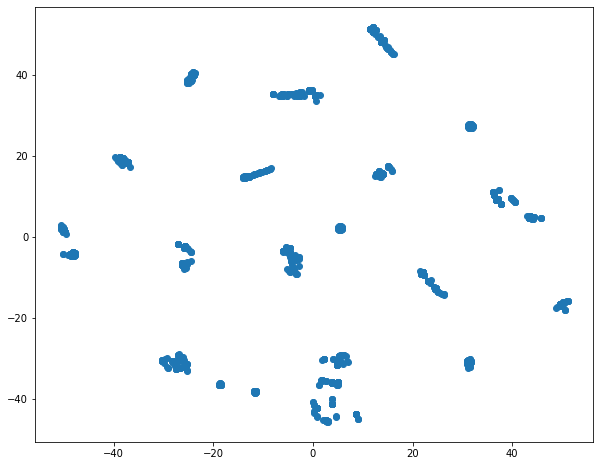

In [19]:
# print the matrix by features
plt.figure(num=1, figsize=(10,8))

plt.scatter(tsne_1000.embedding_[:, 0], tsne_1000.embedding_[:, 1]);

In [20]:
# First 10000 rows

N1 = 10000
N2 = len(data)
indexes_to_drop = np.array(range(N1,N2))
indexes_to_keep = set(range(data.shape[0])) - set(indexes_to_drop)

data3 = data.take(list(indexes_to_keep))

data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
Ask          10000 non-null float32
Bid          10000 non-null float32
AskVolume    10000 non-null float32
BidVolume    10000 non-null float32
DateT        10000 non-null int64
dtypes: float32(4), int64(1)
memory usage: 312.5 KB


In [21]:
tsne_10000 = TSNE(random_state=0)
# random_state - randomness control parameter, depending on it there will be different pictures
# default output dimension n_components = 2(plane)

In [22]:
%%time
tsne_10000.fit(data3)

Wall time: 1min 19s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

In [23]:
tsne_10000.embedding_.shape  # dimentions are 2 !

(10000, 2)

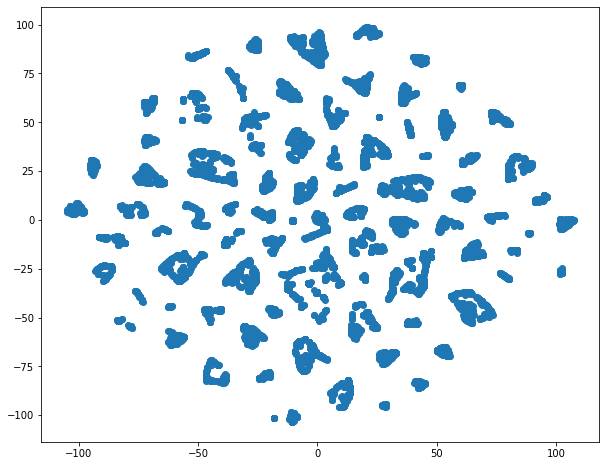

In [24]:
# print the matrix by features

plt.figure(num=1, figsize=(10,8))

plt.scatter(tsne_10000.embedding_[:, 0], tsne_10000.embedding_[:, 1]);

In [25]:
# First 50000 rows

N1 = 50000
N2 = len(data)
indexes_to_drop = np.array(range(N1,N2))
indexes_to_keep = set(range(data.shape[0])) - set(indexes_to_drop)

data4 = data.take(list(indexes_to_keep))

data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 5 columns):
Ask          50000 non-null float32
Bid          50000 non-null float32
AskVolume    50000 non-null float32
BidVolume    50000 non-null float32
DateT        50000 non-null int64
dtypes: float32(4), int64(1)
memory usage: 1.5 MB


In [26]:
tsne_50000 = TSNE(random_state=0)
# random_state - randomness control parameter, depending on it there will be different pictures
# default output dimension n_components = 2(plane)

In [27]:
%%time
tsne_50000.fit(data4)

Wall time: 5min 39s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

In [28]:
tsne_50000.embedding_.shape  # dimentions are 2 !

(50000, 2)

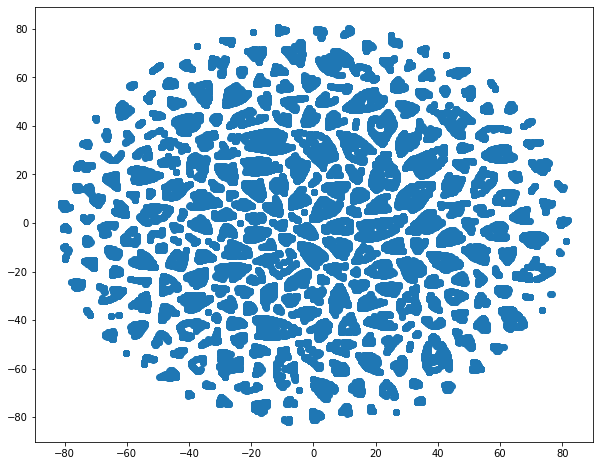

In [29]:
# print the matrix by features

plt.figure(num=1, figsize=(10,8))

plt.scatter(tsne_50000.embedding_[:, 0], tsne_50000.embedding_[:, 1]);

## Relative Data
#### Deltas at prices, interval with previous tick and margin

In [31]:
# FOREX EURUSD: с 01.01.2019 по 30.06.2019

data = pd.read_csv('/Users/vital/Python_Code/PhD_Code/2019 July/Ticks/Dukastcopy/EURUSD_ticks_2019-6.csv', sep=';')

print(data.dtypes)
print(data.head(n=10)) 
print(data[-5:]) 

Time (UTC)     object
Ask           float64
Bid           float64
AskVolume     float64
BidVolume     float64
dtype: object
                Time (UTC)      Ask      Bid  AskVolume  BidVolume
0  2019.01.01 22:02:37.254  1.14682  1.14598       0.75       3.75
1  2019.01.01 22:02:38.590  1.14682  1.14599       0.75       2.25
2  2019.01.01 22:02:39.138  1.14684  1.14599       0.75       3.75
3  2019.01.01 22:02:55.787  1.14684  1.14598       0.75       3.75
4  2019.01.01 22:03:02.060  1.14684  1.14598       0.75       3.75
5  2019.01.01 22:03:12.290  1.14684  1.14599       0.75       3.00
6  2019.01.01 22:03:16.253  1.14684  1.14599       0.75       3.00
7  2019.01.01 22:03:58.115  1.14691  1.14607       1.12       0.75
8  2019.01.01 22:03:59.146  1.14678  1.14607       0.75       0.75
9  2019.01.01 22:04:00.208  1.14684  1.14607       0.75       0.75
                       Time (UTC)      Ask      Bid  AskVolume  BidVolume
16680590  2019.06.30 23:58:52.782  1.13606  1.13603       2.25   

In [32]:
data['DateT'] = pd.to_datetime(data['Time (UTC)'])

data = data.drop(['Time (UTC)'],axis=1) 

print(data.dtypes)
print(data.head(n=5))

Ask                 float64
Bid                 float64
AskVolume           float64
BidVolume           float64
DateT        datetime64[ns]
dtype: object
       Ask      Bid  AskVolume  BidVolume                   DateT
0  1.14682  1.14598       0.75       3.75 2019-01-01 22:02:37.254
1  1.14682  1.14599       0.75       2.25 2019-01-01 22:02:38.590
2  1.14684  1.14599       0.75       3.75 2019-01-01 22:02:39.138
3  1.14684  1.14598       0.75       3.75 2019-01-01 22:02:55.787
4  1.14684  1.14598       0.75       3.75 2019-01-01 22:03:02.060


In [33]:
# time intervals
data['DateDelta_2'] = data['DateT'].diff()           

print(data.dtypes)
print(data.head(n=6))

Ask                    float64
Bid                    float64
AskVolume              float64
BidVolume              float64
DateT           datetime64[ns]
DateDelta_2    timedelta64[ns]
dtype: object
       Ask      Bid  AskVolume  BidVolume                   DateT  \
0  1.14682  1.14598       0.75       3.75 2019-01-01 22:02:37.254   
1  1.14682  1.14599       0.75       2.25 2019-01-01 22:02:38.590   
2  1.14684  1.14599       0.75       3.75 2019-01-01 22:02:39.138   
3  1.14684  1.14598       0.75       3.75 2019-01-01 22:02:55.787   
4  1.14684  1.14598       0.75       3.75 2019-01-01 22:03:02.060   
5  1.14684  1.14599       0.75       3.00 2019-01-01 22:03:12.290   

      DateDelta_2  
0             NaT  
1 00:00:01.336000  
2 00:00:00.548000  
3 00:00:16.649000  
4 00:00:06.273000  
5 00:00:10.230000  


In [34]:
# intervals to integer
data['DateDelta'] = pd.to_numeric(data['DateDelta_2'],downcast='integer') 

print(data.dtypes)
print(data.head(n=6))

Ask                    float64
Bid                    float64
AskVolume              float64
BidVolume              float64
DateT           datetime64[ns]
DateDelta_2    timedelta64[ns]
DateDelta                int64
dtype: object
       Ask      Bid  AskVolume  BidVolume                   DateT  \
0  1.14682  1.14598       0.75       3.75 2019-01-01 22:02:37.254   
1  1.14682  1.14599       0.75       2.25 2019-01-01 22:02:38.590   
2  1.14684  1.14599       0.75       3.75 2019-01-01 22:02:39.138   
3  1.14684  1.14598       0.75       3.75 2019-01-01 22:02:55.787   
4  1.14684  1.14598       0.75       3.75 2019-01-01 22:03:02.060   
5  1.14684  1.14599       0.75       3.00 2019-01-01 22:03:12.290   

      DateDelta_2            DateDelta  
0             NaT -9223372036854775808  
1 00:00:01.336000           1336000000  
2 00:00:00.548000            548000000  
3 00:00:16.649000          16649000000  
4 00:00:06.273000           6273000000  
5 00:00:10.230000          10230000000 

In [35]:

data['DateDelta'].loc[0]   = 0  

C:\Users\vital\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [36]:

data = data.drop(['DateT', 'DateDelta_2'],axis=1) 

print(data.dtypes)
print(data.head(n=6))
print(data.tail(n=6))

Ask          float64
Bid          float64
AskVolume    float64
BidVolume    float64
DateDelta      int64
dtype: object
       Ask      Bid  AskVolume  BidVolume    DateDelta
0  1.14682  1.14598       0.75       3.75            0
1  1.14682  1.14599       0.75       2.25   1336000000
2  1.14684  1.14599       0.75       3.75    548000000
3  1.14684  1.14598       0.75       3.75  16649000000
4  1.14684  1.14598       0.75       3.75   6273000000
5  1.14684  1.14599       0.75       3.00  10230000000
              Ask      Bid  AskVolume  BidVolume   DateDelta
16680589  1.13605  1.13603       1.00       3.75  2691000000
16680590  1.13606  1.13603       2.25       1.25  1489000000
16680591  1.13605  1.13604       1.00       1.00   696000000
16680592  1.13606  1.13603       1.50       1.25  3000000000
16680593  1.13605  1.13603       1.00       1.25  1894000000
16680594  1.13605  1.13602       1.50       1.50   971000000


In [37]:

#data['DateDelta']      = data['DateDelta'].div(1000000 , axis=0)  # it is float
data['DateDelta']   = data['DateDelta']/1000000    # it is float
print(data.dtypes)
print(data.head(n=3))

Ask          float64
Bid          float64
AskVolume    float64
BidVolume    float64
DateDelta    float64
dtype: object
       Ask      Bid  AskVolume  BidVolume  DateDelta
0  1.14682  1.14598       0.75       3.75        0.0
1  1.14682  1.14599       0.75       2.25     1336.0
2  1.14684  1.14599       0.75       3.75      548.0


In [38]:
# to integer
data['DateDelta'] = data['DateDelta'].astype(int)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680595 entries, 0 to 16680594
Data columns (total 5 columns):
Ask          float64
Bid          float64
AskVolume    float64
BidVolume    float64
DateDelta    int32
dtypes: float64(4), int32(1)
memory usage: 572.7 MB


In [39]:
# reducing size
data['Ask']       = pd.to_numeric(data['Ask'],downcast='float')
data['Bid']       = pd.to_numeric(data['Bid'],downcast='float')
data['AskVolume'] = pd.to_numeric(data['AskVolume'],downcast='float')
data['BidVolume'] = pd.to_numeric(data['BidVolume'],downcast='float')

data['DateDelta'] = pd.to_numeric(data['DateDelta'],downcast='integer')

data.info()
print(data.head(n=5)) 
print(data[-5:]) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680595 entries, 0 to 16680594
Data columns (total 5 columns):
Ask          float32
Bid          float32
AskVolume    float32
BidVolume    float32
DateDelta    int32
dtypes: float32(4), int32(1)
memory usage: 318.2 MB
       Ask      Bid  AskVolume  BidVolume  DateDelta
0  1.14682  1.14598       0.75       3.75          0
1  1.14682  1.14599       0.75       2.25       1336
2  1.14684  1.14599       0.75       3.75        548
3  1.14684  1.14598       0.75       3.75      16649
4  1.14684  1.14598       0.75       3.75       6273
              Ask      Bid  AskVolume  BidVolume  DateDelta
16680590  1.13606  1.13603       2.25       1.25       1489
16680591  1.13605  1.13604       1.00       1.00        696
16680592  1.13606  1.13603       1.50       1.25       3000
16680593  1.13605  1.13603       1.00       1.25       1894
16680594  1.13605  1.13602       1.50       1.50        971


In [40]:
# Deltas between neighboring prices Ask и Bid

In [41]:
# numpy Ask
Ask_vals = data['Ask'].values
Ask_vals

array([1.14682, 1.14682, 1.14684, ..., 1.13606, 1.13605, 1.13605],
      dtype=float32)

In [42]:
# numpy Bid
Bid_vals = data['Bid'].values
Bid_vals

array([1.14598, 1.14599, 1.14599, ..., 1.13603, 1.13603, 1.13602],
      dtype=float32)

In [43]:

diffs_Ask = Ask_vals[1:] - Ask_vals[:-1]
diffs_Bid = Bid_vals[1:] - Bid_vals[:-1]

In [44]:

data['Ask_delta'] = pd.DataFrame(diffs_Ask)
data['Bid_delta'] = pd.DataFrame(diffs_Bid)
data.info()
print(data.head(n=10))
print(data.tail(n=10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680595 entries, 0 to 16680594
Data columns (total 7 columns):
Ask          float32
Bid          float32
AskVolume    float32
BidVolume    float32
DateDelta    int32
Ask_delta    float32
Bid_delta    float32
dtypes: float32(6), int32(1)
memory usage: 445.4 MB
       Ask      Bid  AskVolume  BidVolume  DateDelta  Ask_delta  Bid_delta
0  1.14682  1.14598       0.75       3.75          0    0.00000    0.00001
1  1.14682  1.14599       0.75       2.25       1336    0.00002    0.00000
2  1.14684  1.14599       0.75       3.75        548    0.00000   -0.00001
3  1.14684  1.14598       0.75       3.75      16649    0.00000    0.00000
4  1.14684  1.14598       0.75       3.75       6273    0.00000    0.00001
5  1.14684  1.14599       0.75       3.00      10230    0.00000    0.00000
6  1.14684  1.14599       0.75       3.00       3963    0.00007    0.00008
7  1.14691  1.14607       1.12       0.75      41862   -0.00013    0.00000
8  1.14678  1.

In [45]:
# Move the Delt columns down one line
data['Ask_delta'] = data['Ask_delta'].shift(1)
data['Bid_delta'] = data['Bid_delta'].shift(1)
data.info()
print(data.head(n=10))
print(data.tail(n=10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680595 entries, 0 to 16680594
Data columns (total 7 columns):
Ask          float32
Bid          float32
AskVolume    float32
BidVolume    float32
DateDelta    int32
Ask_delta    float32
Bid_delta    float32
dtypes: float32(6), int32(1)
memory usage: 445.4 MB
       Ask      Bid  AskVolume  BidVolume  DateDelta  Ask_delta  Bid_delta
0  1.14682  1.14598       0.75       3.75          0        NaN        NaN
1  1.14682  1.14599       0.75       2.25       1336    0.00000    0.00001
2  1.14684  1.14599       0.75       3.75        548    0.00002    0.00000
3  1.14684  1.14598       0.75       3.75      16649    0.00000   -0.00001
4  1.14684  1.14598       0.75       3.75       6273    0.00000    0.00000
5  1.14684  1.14599       0.75       3.00      10230    0.00000    0.00001
6  1.14684  1.14599       0.75       3.00       3963    0.00000    0.00000
7  1.14691  1.14607       1.12       0.75      41862    0.00007    0.00008
8  1.14678  1.

In [46]:
# Deltas to integer

data['Ask_delta'].loc[0]   = 0 
data['Bid_delta'].loc[0]   = 0  
# * 100.000
data['Ask_delta'] = data['Ask_delta'] * 100000
data['Bid_delta'] = data['Bid_delta'] * 100000

print(data.head(n=10))
print(data.tail(n=10))

       Ask      Bid  AskVolume  BidVolume  DateDelta  Ask_delta  Bid_delta
0  1.14682  1.14598       0.75       3.75          0   0.000000   0.000000
1  1.14682  1.14599       0.75       2.25       1336   0.000000   1.001358
2  1.14684  1.14599       0.75       3.75        548   2.002716   0.000000
3  1.14684  1.14598       0.75       3.75      16649   0.000000  -1.001358
4  1.14684  1.14598       0.75       3.75       6273   0.000000   0.000000
5  1.14684  1.14599       0.75       3.00      10230   0.000000   1.001358
6  1.14684  1.14599       0.75       3.00       3963   0.000000   0.000000
7  1.14691  1.14607       1.12       0.75      41862   6.997585   7.998943
8  1.14678  1.14607       0.75       0.75       1031 -12.993813   0.000000
9  1.14684  1.14607       0.75       0.75       1062   5.996227   0.000000
              Ask      Bid  AskVolume  BidVolume  DateDelta  Ask_delta  \
16680585  1.13606  1.13604       2.25       1.87        251   1.001358   
16680586  1.13606  1.13603 

In [47]:
# round up according to the rules of mathematics to the whole
data['Ask_delta'] = data['Ask_delta'].round()
data['Bid_delta'] = data['Bid_delta'].round()

print(data.head(n=10))
print(data.tail(n=10))

       Ask      Bid  AskVolume  BidVolume  DateDelta  Ask_delta  Bid_delta
0  1.14682  1.14598       0.75       3.75          0        0.0        0.0
1  1.14682  1.14599       0.75       2.25       1336        0.0        1.0
2  1.14684  1.14599       0.75       3.75        548        2.0        0.0
3  1.14684  1.14598       0.75       3.75      16649        0.0       -1.0
4  1.14684  1.14598       0.75       3.75       6273        0.0        0.0
5  1.14684  1.14599       0.75       3.00      10230        0.0        1.0
6  1.14684  1.14599       0.75       3.00       3963        0.0        0.0
7  1.14691  1.14607       1.12       0.75      41862        7.0        8.0
8  1.14678  1.14607       0.75       0.75       1031      -13.0        0.0
9  1.14684  1.14607       0.75       0.75       1062        6.0        0.0
              Ask      Bid  AskVolume  BidVolume  DateDelta  Ask_delta  \
16680585  1.13606  1.13604       2.25       1.87        251        1.0   
16680586  1.13606  1.13603 

In [48]:
# to integer!
data['Ask_delta'] = data['Ask_delta'].astype(int)
data['Bid_delta'] = data['Bid_delta'].astype(int)
data.info()
print(data.head(n=10))
print(data.tail(n=10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680595 entries, 0 to 16680594
Data columns (total 7 columns):
Ask          float32
Bid          float32
AskVolume    float32
BidVolume    float32
DateDelta    int32
Ask_delta    int32
Bid_delta    int32
dtypes: float32(4), int32(3)
memory usage: 445.4 MB
       Ask      Bid  AskVolume  BidVolume  DateDelta  Ask_delta  Bid_delta
0  1.14682  1.14598       0.75       3.75          0          0          0
1  1.14682  1.14599       0.75       2.25       1336          0          1
2  1.14684  1.14599       0.75       3.75        548          2          0
3  1.14684  1.14598       0.75       3.75      16649          0         -1
4  1.14684  1.14598       0.75       3.75       6273          0          0
5  1.14684  1.14599       0.75       3.00      10230          0          1
6  1.14684  1.14599       0.75       3.00       3963          0          0
7  1.14691  1.14607       1.12       0.75      41862          7          8
8  1.14678  1.1460

In [49]:
# margin (Ask - Bid)

data['Margin'] = data['Ask'] - data['Bid']
print(data.dtypes)
print(data.head(n=10))
print(data.tail(n=10))

Ask          float32
Bid          float32
AskVolume    float32
BidVolume    float32
DateDelta      int32
Ask_delta      int32
Bid_delta      int32
Margin       float32
dtype: object
       Ask      Bid  AskVolume  BidVolume  DateDelta  Ask_delta  Bid_delta  \
0  1.14682  1.14598       0.75       3.75          0          0          0   
1  1.14682  1.14599       0.75       2.25       1336          0          1   
2  1.14684  1.14599       0.75       3.75        548          2          0   
3  1.14684  1.14598       0.75       3.75      16649          0         -1   
4  1.14684  1.14598       0.75       3.75       6273          0          0   
5  1.14684  1.14599       0.75       3.00      10230          0          1   
6  1.14684  1.14599       0.75       3.00       3963          0          0   
7  1.14691  1.14607       1.12       0.75      41862          7          8   
8  1.14678  1.14607       0.75       0.75       1031        -13          0   
9  1.14684  1.14607       0.75       0

In [50]:
# margin ещ integer
data['Margin'] = data['Margin'] * 100000

print(data.head(n=10))
print(data.tail(n=10))

       Ask      Bid  AskVolume  BidVolume  DateDelta  Ask_delta  Bid_delta  \
0  1.14682  1.14598       0.75       3.75          0          0          0   
1  1.14682  1.14599       0.75       2.25       1336          0          1   
2  1.14684  1.14599       0.75       3.75        548          2          0   
3  1.14684  1.14598       0.75       3.75      16649          0         -1   
4  1.14684  1.14598       0.75       3.75       6273          0          0   
5  1.14684  1.14599       0.75       3.00      10230          0          1   
6  1.14684  1.14599       0.75       3.00       3963          0          0   
7  1.14691  1.14607       1.12       0.75      41862          7          8   
8  1.14678  1.14607       0.75       0.75       1031        -13          0   
9  1.14684  1.14607       0.75       0.75       1062          6          0   

      Margin  
0  83.994865  
1  82.993507  
2  84.996223  
3  85.997581  
4  85.997581  
5  84.996223  
6  84.996223  
7  83.994865  
8  71.

In [51]:
# round up according to the rules of mathematics to the integer
data['Margin'] = data['Margin'].round()

print(data.head(n=10))
print(data.tail(n=10))

       Ask      Bid  AskVolume  BidVolume  DateDelta  Ask_delta  Bid_delta  \
0  1.14682  1.14598       0.75       3.75          0          0          0   
1  1.14682  1.14599       0.75       2.25       1336          0          1   
2  1.14684  1.14599       0.75       3.75        548          2          0   
3  1.14684  1.14598       0.75       3.75      16649          0         -1   
4  1.14684  1.14598       0.75       3.75       6273          0          0   
5  1.14684  1.14599       0.75       3.00      10230          0          1   
6  1.14684  1.14599       0.75       3.00       3963          0          0   
7  1.14691  1.14607       1.12       0.75      41862          7          8   
8  1.14678  1.14607       0.75       0.75       1031        -13          0   
9  1.14684  1.14607       0.75       0.75       1062          6          0   

   Margin  
0    84.0  
1    83.0  
2    85.0  
3    86.0  
4    86.0  
5    85.0  
6    85.0  
7    84.0  
8    71.0  
9    77.0  
         

In [52]:
# to integer!
data['Margin'] = data['Margin'].astype(int)

data.info()
print(data.head(n=10))
print(data.tail(n=10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680595 entries, 0 to 16680594
Data columns (total 8 columns):
Ask          float32
Bid          float32
AskVolume    float32
BidVolume    float32
DateDelta    int32
Ask_delta    int32
Bid_delta    int32
Margin       int32
dtypes: float32(4), int32(4)
memory usage: 509.1 MB
       Ask      Bid  AskVolume  BidVolume  DateDelta  Ask_delta  Bid_delta  \
0  1.14682  1.14598       0.75       3.75          0          0          0   
1  1.14682  1.14599       0.75       2.25       1336          0          1   
2  1.14684  1.14599       0.75       3.75        548          2          0   
3  1.14684  1.14598       0.75       3.75      16649          0         -1   
4  1.14684  1.14598       0.75       3.75       6273          0          0   
5  1.14684  1.14599       0.75       3.00      10230          0          1   
6  1.14684  1.14599       0.75       3.00       3963          0          0   
7  1.14691  1.14607       1.12       0.75      418

In [53]:

data = data.drop(['Ask','Bid'],axis=1) 

data.info()
print(data.head(n=10))
print(data.tail(n=10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680595 entries, 0 to 16680594
Data columns (total 6 columns):
AskVolume    float32
BidVolume    float32
DateDelta    int32
Ask_delta    int32
Bid_delta    int32
Margin       int32
dtypes: float32(2), int32(4)
memory usage: 381.8 MB
   AskVolume  BidVolume  DateDelta  Ask_delta  Bid_delta  Margin
0       0.75       3.75          0          0          0      84
1       0.75       2.25       1336          0          1      83
2       0.75       3.75        548          2          0      85
3       0.75       3.75      16649          0         -1      86
4       0.75       3.75       6273          0          0      86
5       0.75       3.00      10230          0          1      85
6       0.75       3.00       3963          0          0      85
7       1.12       0.75      41862          7          8      84
8       0.75       0.75       1031        -13          0      71
9       0.75       0.75       1062          6          0      77
 

## t-SNE
### relative data

In [54]:
# First 1000 rows

N1 = 1000
N2 = len(data)
indexes_to_drop = np.array(range(N1,N2))
indexes_to_keep = set(range(data.shape[0])) - set(indexes_to_drop)

data2 = data.take(list(indexes_to_keep))

data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
AskVolume    1000 non-null float32
BidVolume    1000 non-null float32
DateDelta    1000 non-null int32
Ask_delta    1000 non-null int32
Bid_delta    1000 non-null int32
Margin       1000 non-null int32
dtypes: float32(2), int32(4)
memory usage: 31.2 KB


In [55]:
tsne_1000 = TSNE(random_state=0)
# random_state - randomness control parameter, depending on it there will be different pictures
# default output dimension n_components = 2(plane)

In [56]:
%%time
tsne_1000.fit(data2)

Wall time: 3.62 s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

In [57]:
tsne_1000.embedding_.shape  # dimentions are 2 !

(1000, 2)

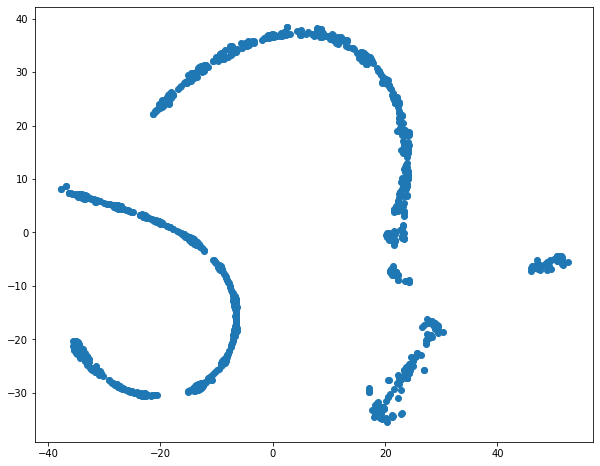

In [58]:
# print the matrix by features
plt.figure(num=1, figsize=(10,8))

plt.scatter(tsne_1000.embedding_[:, 0], tsne_1000.embedding_[:, 1]);

In [60]:
# First 10000 rows

N1 = 10000
N2 = len(data)
indexes_to_drop = np.array(range(N1,N2))
indexes_to_keep = set(range(data.shape[0])) - set(indexes_to_drop)

data3 = data.take(list(indexes_to_keep))

data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 6 columns):
AskVolume    10000 non-null float32
BidVolume    10000 non-null float32
DateDelta    10000 non-null int32
Ask_delta    10000 non-null int32
Bid_delta    10000 non-null int32
Margin       10000 non-null int32
dtypes: float32(2), int32(4)
memory usage: 312.5 KB


In [61]:
tsne_10000 = TSNE(random_state=0)
# random_state - randomness control parameter, depending on it there will be different pictures
# default output dimension n_components = 2(plane)

In [62]:
%%time
tsne_10000.fit(data3)

Wall time: 1min 6s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

In [63]:
tsne_10000.embedding_.shape  # dimentions are 2 !

(10000, 2)

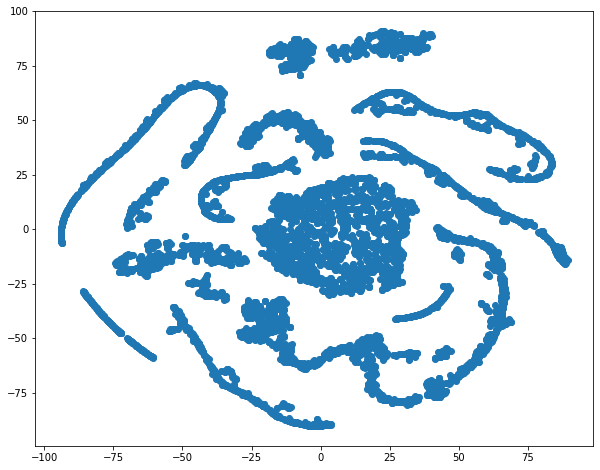

In [64]:
# print the matrix by features

plt.figure(num=1, figsize=(10,8))

plt.scatter(tsne_10000.embedding_[:, 0], tsne_10000.embedding_[:, 1]);

In [65]:
# First 50000 rows

N1 = 50000
N2 = len(data)
indexes_to_drop = np.array(range(N1,N2))
indexes_to_keep = set(range(data.shape[0])) - set(indexes_to_drop)

data4 = data.take(list(indexes_to_keep))

data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 6 columns):
AskVolume    50000 non-null float32
BidVolume    50000 non-null float32
DateDelta    50000 non-null int32
Ask_delta    50000 non-null int32
Bid_delta    50000 non-null int32
Margin       50000 non-null int32
dtypes: float32(2), int32(4)
memory usage: 1.5 MB


In [66]:
tsne_50000 = TSNE(random_state=0)
# random_state - randomness control parameter, depending on it there will be different pictures
# default output dimension n_components = 2(plane)

In [67]:
%%time
tsne_50000.fit(data4)

Wall time: 8min 23s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

In [68]:
tsne_50000.embedding_.shape  # dimentions are 2 !

(50000, 2)

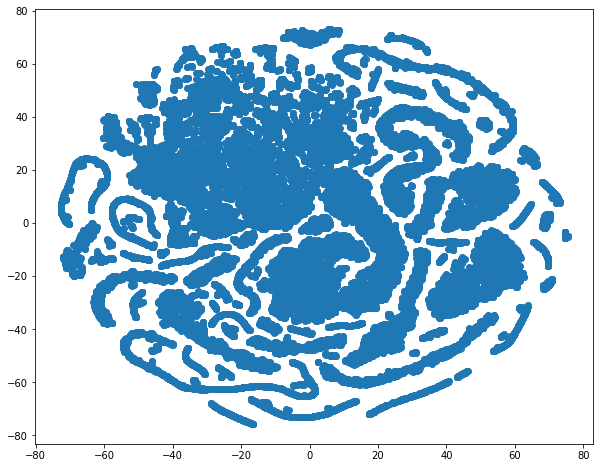

In [69]:
# print the matrix by features

plt.figure(num=1, figsize=(10,8))

plt.scatter(tsne_50000.embedding_[:, 0], tsne_50000.embedding_[:, 1]);

In [70]:
# Random 1000 rows 

import random

n_rand = random.randint(0, data.shape[0] - 1000)
NN = 1000

indexes_to_drop1 = np.array(range(0,n_rand))
indexes_to_drop2 = np.array(range(n_rand+NN,data.shape[0]))
indexes_to_keep = set(range(data.shape[0])) - set(indexes_to_drop1) - set(indexes_to_drop2)
data5 = data.take(list(indexes_to_keep))

data5.info()
print(n_rand)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 346112 to 346111
Data columns (total 6 columns):
AskVolume    1000 non-null float32
BidVolume    1000 non-null float32
DateDelta    1000 non-null int32
Ask_delta    1000 non-null int32
Bid_delta    1000 non-null int32
Margin       1000 non-null int32
dtypes: float32(2), int32(4)
memory usage: 31.2 KB
346055


In [71]:
tsne_1000_Random = TSNE(random_state=0)
# random_state - randomness control parameter, depending on it there will be different pictures
# default output dimension n_components = 2(plane)

In [72]:
%%time
tsne_1000_Random.fit(data5)

Wall time: 4.37 s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

In [73]:
tsne_1000_Random.embedding_.shape  # dimentions are 2 !

(1000, 2)

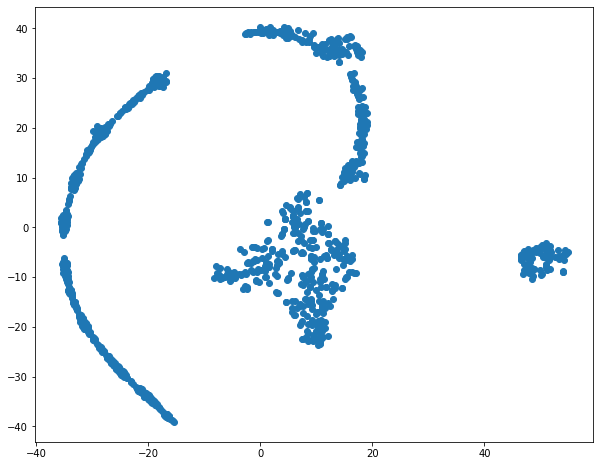

In [74]:
# первая рандомная картинка c n_rand = 12.927.804
# print the matrix by features

plt.figure(num=1, figsize=(10,8))

plt.scatter(tsne_1000_Random.embedding_[:, 0], tsne_1000_Random.embedding_[:, 1]);

In [75]:
# one more random 1000 rows


n_rand = random.randint(0, data.shape[0] - 1000)
NN = 1000

indexes_to_drop1 = np.array(range(0,n_rand))
indexes_to_drop2 = np.array(range(n_rand+NN,data.shape[0]))
indexes_to_keep = set(range(data.shape[0])) - set(indexes_to_drop1) - set(indexes_to_drop2)
data5 = data.take(list(indexes_to_keep))

data5.info()
print(n_rand)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 991590 to 992589
Data columns (total 6 columns):
AskVolume    1000 non-null float32
BidVolume    1000 non-null float32
DateDelta    1000 non-null int32
Ask_delta    1000 non-null int32
Bid_delta    1000 non-null int32
Margin       1000 non-null int32
dtypes: float32(2), int32(4)
memory usage: 31.2 KB
991590


In [76]:
tsne_1000_Random = TSNE(random_state=0)
# random_state - randomness control parameter, depending on it there will be different pictures
# default output dimension n_components = 2(plane)

In [77]:
%%time
tsne_1000_Random.fit(data5)

Wall time: 4.21 s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

In [78]:
tsne_1000_Random.embedding_.shape  # dimentions are 2 !

(1000, 2)

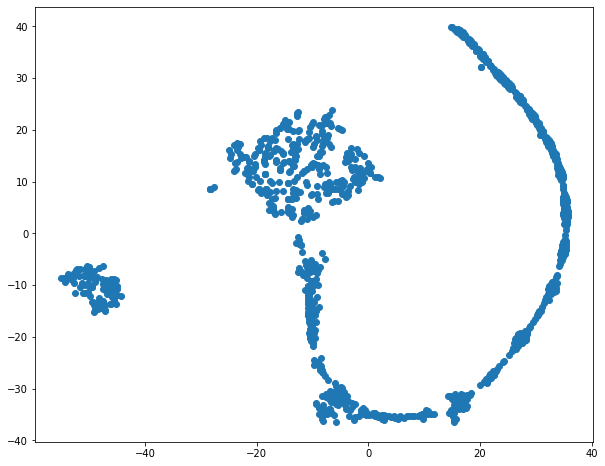

In [79]:
# вторая рандомная картинка c n_rand = 9.332.757
# print the matrix by features

plt.figure(num=1, figsize=(10,8))

plt.scatter(tsne_1000_Random.embedding_[:, 0], tsne_1000_Random.embedding_[:, 1]);

## Let's move the Delta for the price
#### Move up, those are now on the same line as the volumes, the interval with the previous tick and Delta by Ask and Bid with the FUTURE (!!) tick. We are looking for the dependence of the future price on the previous interval, volume and margin

In [80]:

data['Ask_delta'] = data['Ask_delta'].shift(-1)
data['Bid_delta'] = data['Bid_delta'].shift(-1)
data.info()
print(data.head(n=10))
print(data.tail(n=10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680595 entries, 0 to 16680594
Data columns (total 6 columns):
AskVolume    float32
BidVolume    float32
DateDelta    int32
Ask_delta    float64
Bid_delta    float64
Margin       int32
dtypes: float32(2), float64(2), int32(2)
memory usage: 509.1 MB
   AskVolume  BidVolume  DateDelta  Ask_delta  Bid_delta  Margin
0       0.75       3.75          0        0.0        1.0      84
1       0.75       2.25       1336        2.0        0.0      83
2       0.75       3.75        548        0.0       -1.0      85
3       0.75       3.75      16649        0.0        0.0      86
4       0.75       3.75       6273        0.0        1.0      86
5       0.75       3.00      10230        0.0        0.0      85
6       0.75       3.00       3963        7.0        8.0      85
7       1.12       0.75      41862      -13.0        0.0      84
8       0.75       0.75       1031        6.0        0.0      71
9       0.75       0.75       1062      -15.0     

In [81]:

data['Ask_delta'].loc[len(data)-1] = 0 
data['Bid_delta'].loc[len(data)-1] = 0 

data.info()
print(data.head(n=10))
print(data.tail(n=10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680595 entries, 0 to 16680594
Data columns (total 6 columns):
AskVolume    float32
BidVolume    float32
DateDelta    int32
Ask_delta    float64
Bid_delta    float64
Margin       int32
dtypes: float32(2), float64(2), int32(2)
memory usage: 509.1 MB
   AskVolume  BidVolume  DateDelta  Ask_delta  Bid_delta  Margin
0       0.75       3.75          0        0.0        1.0      84
1       0.75       2.25       1336        2.0        0.0      83
2       0.75       3.75        548        0.0       -1.0      85
3       0.75       3.75      16649        0.0        0.0      86
4       0.75       3.75       6273        0.0        1.0      86
5       0.75       3.00      10230        0.0        0.0      85
6       0.75       3.00       3963        7.0        8.0      85
7       1.12       0.75      41862      -13.0        0.0      84
8       0.75       0.75       1031        6.0        0.0      71
9       0.75       0.75       1062      -15.0     

C:\Users\vital\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### Color active Ticks

In [319]:
# Create a new DataFrame - 'responses': Y
# Y = 0 - the next tick did not exceed the margin (the vast majority of ticks)
# Y = 1 - Ask and Bid of the next tick went up - a real break up
# Y = 2 - Ask of the next tick went up, and Bid remained the same (those margins expanded up)
# Y = 3 - Bid of the next tick went down, and Ask remained the same (those margins expanded down)
# Y = 4 - Ask and Bid of the next tick went down - a real break down
# Y = 5 - Margin has diverged: Ask has increased, and Bid has decreased

Y = pd.DataFrame(numpy.zeros(len(data.index))) 
Y = pd.to_numeric(Y[0],downcast='integer')
Y

0           0
1           0
2           0
3           0
4           0
           ..
16680590    0
16680591    0
16680592    0
16680593    0
16680594    0
Name: 0, Length: 16680595, dtype: int8

#### Create Y

In [ ]:
# real break up = 1

In [320]:
Y1 = ( ((data['Bid_delta'] - data['Margin']) >= 0) & ( (data['Ask_delta'] - data['Margin']) >= 0)).astype(int)

In [321]:
# count() 
Y1.value_counts()

0    16381544
1      299051
dtype: int64

In [301]:
# real break down = 4

In [351]:
Y4 = ( ((data['Bid_delta'] + data['Margin']) <= 0) & ( (data['Ask_delta'] + data['Margin']) <= 0) ).astype(int)

In [352]:
Y4[Y4==1] = Y4[Y4==1] + 3

In [353]:

Y4.value_counts() 

0    16377248
4      303347
dtype: int64

In [261]:
# margin expanded greatly up = 2

In [355]:
Y2 = ((data['Bid_delta'] == 0) & ( (data['Ask_delta'] - data['Margin']) >= 0) ).astype(int)

In [356]:
Y2[Y2==1] = Y2[Y2==1] + 1

In [357]:

Y2.value_counts() 

0    16188347
2      492248
dtype: int64

In [358]:
# margin expanded down = 3

In [359]:
Y3 = (((data['Bid_delta'] + data['Margin']) <= 0) & (data['Ask_delta'] == 0) ).astype(int)

In [360]:
Y3[Y3==1] = Y3[Y3==1] + 2

In [361]:

Y3.value_counts()

0    16192485
3      488110
dtype: int64

In [ ]:
# margin diverged = 5

In [362]:
Y5 = ((data['Bid_delta'] < 0) &  (data['Ask_delta'] > 0) ).astype(int)

In [363]:
Y5[Y5==1] = Y5[Y5==1] + 4

In [364]:

Y5.value_counts()

0    15897823
5      782772
dtype: int64

In [365]:
Y = Y1 + Y2 + Y3 + Y4 + Y5

In [444]:

Y[Y==0] = Y[Y==0] + 6

In [445]:
Y.value_counts()  

6    14315067
5      782772
2      492248
3      488110
4      303347
1      299051
dtype: int64

In [ ]:
# pie()

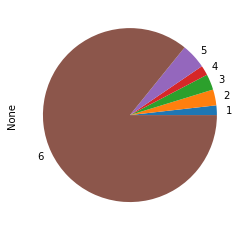

In [446]:
Y.value_counts(sort=False).plot.pie()
plt.show()

## t-SNE
### relative (random) data with deltas known in advance one step ahead at Ask and Bid prices

In [377]:
# random 1000 rows 

import random

n_rand = random.randint(0, data.shape[0] - 1000)
NN = 1000

indexes_to_drop1 = np.array(range(0,n_rand))
indexes_to_drop2 = np.array(range(n_rand+NN,data.shape[0]))
indexes_to_keep = set(range(data.shape[0])) - set(indexes_to_drop1) - set(indexes_to_drop2)
data6 = data.take(list(indexes_to_keep))

data6.info()
print(n_rand)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 5797888 to 5797887
Data columns (total 6 columns):
AskVolume    1000 non-null float32
BidVolume    1000 non-null float32
DateDelta    1000 non-null int32
Ask_delta    1000 non-null float32
Bid_delta    1000 non-null float32
Margin       1000 non-null int32
dtypes: float32(4), int32(2)
memory usage: 31.2 KB
5797357


In [390]:
# Y size 1.000 random
Y6 = Y.take(list(indexes_to_keep))

print(Y6.size)
print(n_rand)

1000
5797357


In [434]:

Y6[Y6==0] = Y6[Y6==0] + 6

In [436]:
 
Y6[Y6==6] = Y6[Y6==6] - 6

In [435]:

Y6.value_counts()  

6    848
5     87
3     31
2     23
1      9
4      2
dtype: int64

In [384]:
tsne_1000_Random = TSNE(random_state=0)
# random_state - randomness control parameter, depending on it there will be different pictures
# default output dimension n_components = 2(plane)

In [385]:
%%time
tsne_1000_Random.fit(data6)

Wall time: 3.85 s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

In [386]:
tsne_1000_Random.embedding_.shape  # dimentions are 2 !

(1000, 2)

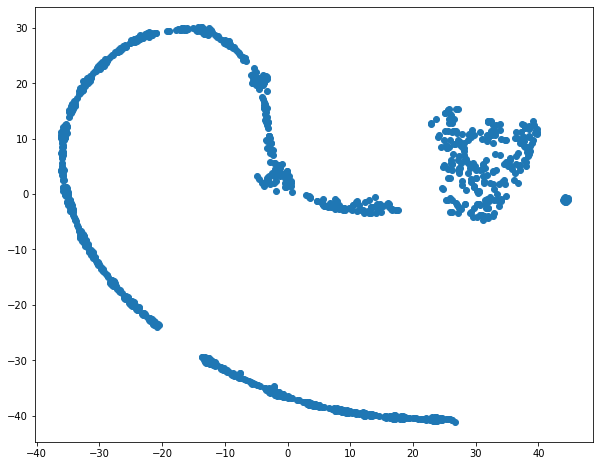

In [387]:
# random with n_rand = 5.797.357 and NN = 1.000
# print the matrix by features

plt.figure(num=1, figsize=(10,8))

plt.scatter(tsne_1000_Random.embedding_[:, 0], tsne_1000_Random.embedding_[:, 1]);

Text(0.5, 1.0, 'Random 10,000. t-SNE projection')

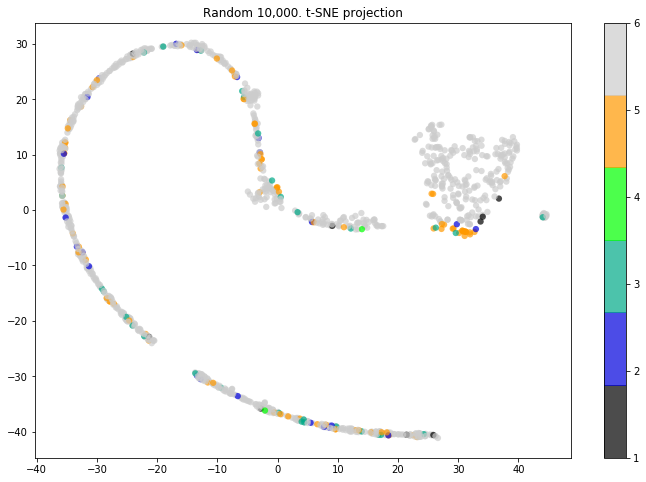

In [393]:
plt.figure(num=1, figsize=(12,8))
plt.scatter(tsne_1000_Random.embedding_[:, 0], tsne_1000_Random.embedding_[:, 1], 
            c=Y6, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('Random 10,000. t-SNE projection')

Text(0.5, 1.0, 'Random 10,000. t-SNE projection')

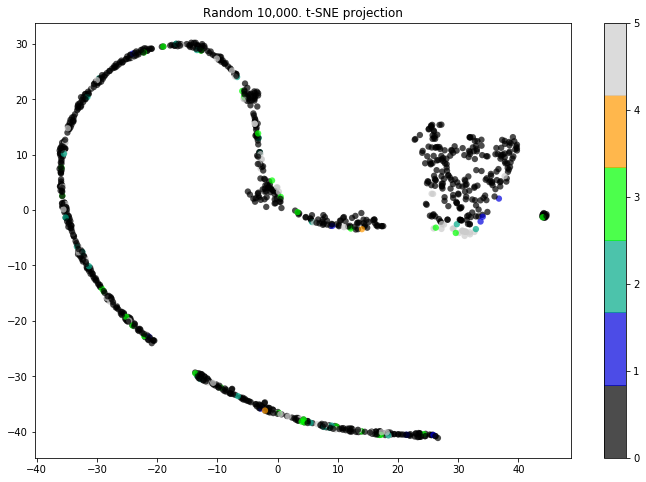

In [437]:
plt.figure(num=1, figsize=(12,8))
plt.scatter(tsne_1000_Random.embedding_[:, 0], tsne_1000_Random.embedding_[:, 1], 
            c=Y6, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('Random 10,000. t-SNE projection')

In [394]:
# random 10.000 rows 

import random

NN = 10000
n_rand = random.randint(0, data.shape[0] - NN)

indexes_to_drop1 = np.array(range(0,n_rand))
indexes_to_drop2 = np.array(range(n_rand+NN,data.shape[0]))
indexes_to_keep = set(range(data.shape[0])) - set(indexes_to_drop1) - set(indexes_to_drop2)
data7 = data.take(list(indexes_to_keep))

data7.info()
print(n_rand)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 13618595 to 13628594
Data columns (total 6 columns):
AskVolume    10000 non-null float32
BidVolume    10000 non-null float32
DateDelta    10000 non-null int32
Ask_delta    10000 non-null float32
Bid_delta    10000 non-null float32
Margin       10000 non-null int32
dtypes: float32(4), int32(2)
memory usage: 312.5 KB
13618595


In [395]:
#  Y with size 10.000 of random ticks
Y7 = Y.take(list(indexes_to_keep))

print(Y7.size)
print(n_rand)

10000
13618595


In [441]:

Y7[Y7==0] = Y7[Y7==0] + 6

In [428]:

Y7[Y7==6] = Y7[Y7==6] - 6

In [442]:

Y7.value_counts()

6    7984
2     613
5     485
3     460
4     239
1     219
dtype: int64

In [400]:
tsne_10000_Random = TSNE(random_state=0)
# random_state - randomness control parameter, depending on it there will be different pictures
# default output dimension n_components = 2(plane)

In [401]:
%%time
tsne_10000_Random.fit(data7)

Wall time: 1min 11s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

In [402]:
tsne_10000_Random.embedding_.shape  # dimentions are 2 !

(10000, 2)

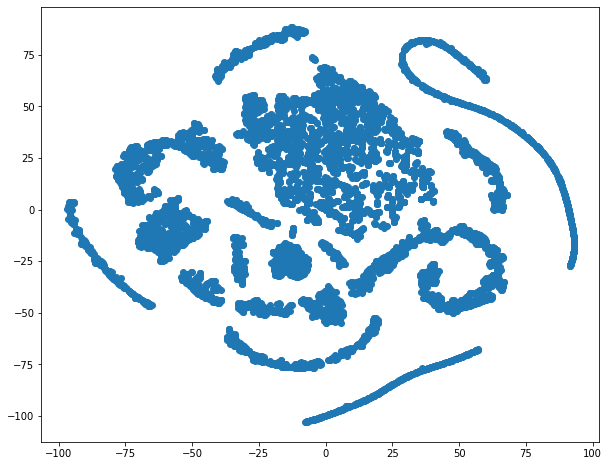

In [403]:
# random with n_rand = 13.618.595 and NN = 10.000
# print the matrix by features

plt.figure(num=1, figsize=(10,8))

plt.scatter(tsne_10000_Random.embedding_[:, 0], tsne_10000_Random.embedding_[:, 1]);

Text(0.5, 1.0, 'Random 10,000. t-SNE projection')

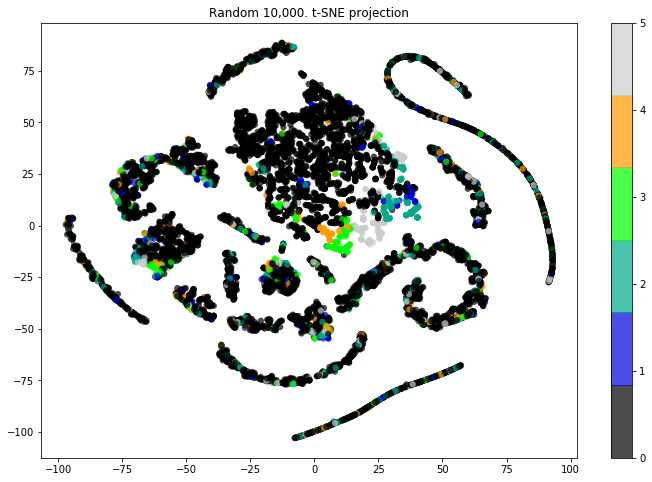

In [430]:
plt.figure(num=1, figsize=(12,8))
plt.scatter(tsne_10000_Random.embedding_[:, 0], tsne_10000_Random.embedding_[:, 1], 
            c=Y7, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('Random 10,000. t-SNE projection')

Text(0.5, 1.0, 'Random 10,000. t-SNE projection')

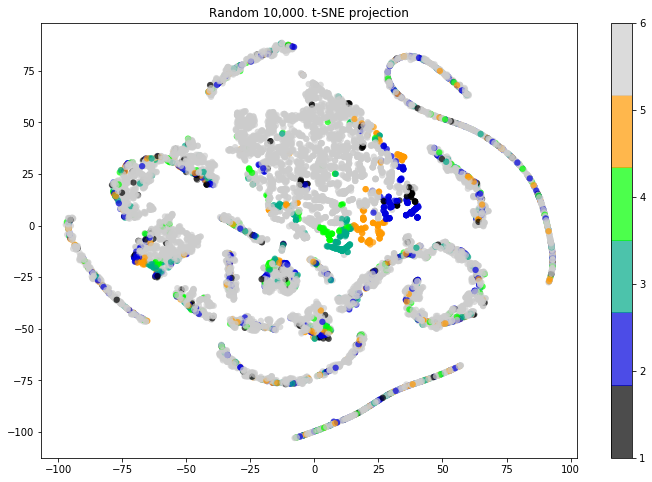

In [443]:
plt.figure(num=1, figsize=(12,8))
plt.scatter(tsne_10000_Random.embedding_[:, 0], tsne_10000_Random.embedding_[:, 1], 
            c=Y7, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('Random 10,000. t-SNE projection')

In [405]:
# random 50.000 rows

import random

NN = 50000
n_rand = random.randint(0, data.shape[0] - NN)

indexes_to_drop1 = np.array(range(0,n_rand))
indexes_to_drop2 = np.array(range(n_rand+NN,data.shape[0]))
indexes_to_keep = set(range(data.shape[0])) - set(indexes_to_drop1) - set(indexes_to_drop2)
data8 = data.take(list(indexes_to_keep))

data8.info()
print(n_rand)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 14417920 to 14417919
Data columns (total 6 columns):
AskVolume    50000 non-null float32
BidVolume    50000 non-null float32
DateDelta    50000 non-null int32
Ask_delta    50000 non-null float32
Bid_delta    50000 non-null float32
Margin       50000 non-null int32
dtypes: float32(4), int32(2)
memory usage: 1.5 MB
14398304


In [406]:
#  Y size 50.000 random ticks
Y8 = Y.take(list(indexes_to_keep))

print(Y8.size)
print(n_rand)

50000
14398304


In [438]:

Y8[Y8==0] = Y8[Y8==0] + 6

In [431]:

Y8[Y8==6] = Y8[Y8==6] - 6

In [432]:

Y8.value_counts() 

0    41240
5     2538
3     1936
2     1766
4     1282
1     1238
dtype: int64

In [410]:
tsne_50000_Random = TSNE(random_state=0)
# random_state - randomness control parameter, depending on it there will be different pictures
# default output dimension n_components = 2(plane)

In [411]:
%%time
tsne_50000_Random.fit(data8)

Wall time: 8min 40s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

In [412]:
tsne_50000_Random.embedding_.shape  # dimentions are 2 !

(50000, 2)

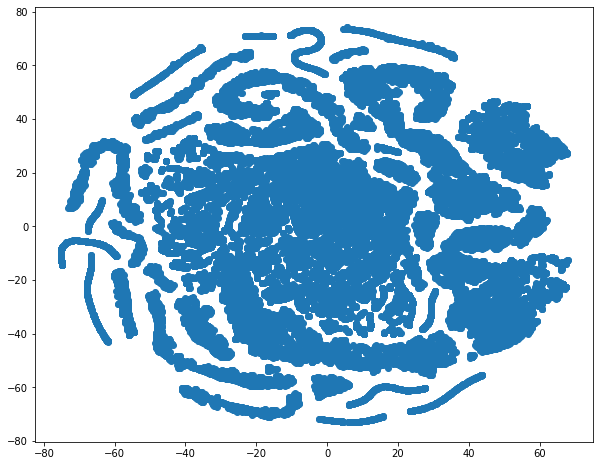

In [413]:
# random with c n_rand = 14.398.304 and NN = 50.000
# print the matrix by features

plt.figure(num=1, figsize=(10,8))

plt.scatter(tsne_50000_Random.embedding_[:, 0], tsne_50000_Random.embedding_[:, 1]);

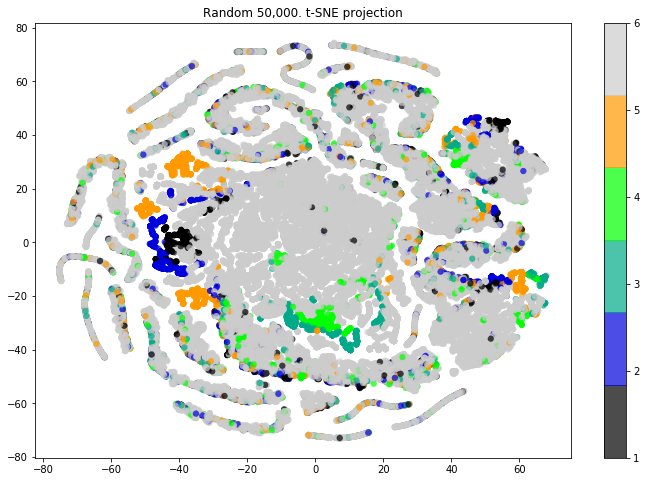

In [439]:
plt.figure(num=1, figsize=(12,8))
plt.scatter(tsne_50000_Random.embedding_[:, 0], tsne_50000_Random.embedding_[:, 1], 
            c=Y8, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('Random 50,000. t-SNE projection');

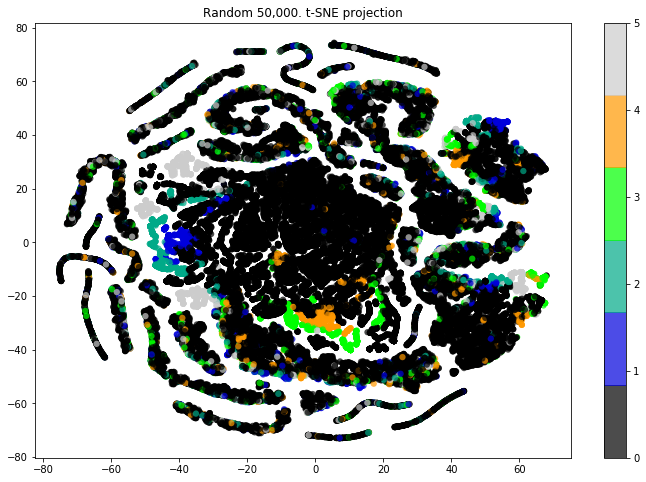

In [433]:
plt.figure(num=1, figsize=(12,8))
plt.scatter(tsne_50000_Random.embedding_[:, 0], tsne_50000_Random.embedding_[:, 1], 
            c=Y8, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('Random 50,000. t-SNE projection');

In [415]:
# random 100.000 rows 

import random

NN = 100000
n_rand = random.randint(0, data.shape[0] - NN)

indexes_to_drop1 = np.array(range(0,n_rand))
indexes_to_drop2 = np.array(range(n_rand+NN,data.shape[0]))
indexes_to_keep = set(range(data.shape[0])) - set(indexes_to_drop1) - set(indexes_to_drop2)
data9 = data.take(list(indexes_to_keep))

data9.info()
print(n_rand)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 14680064 to 14680063
Data columns (total 6 columns):
AskVolume    100000 non-null float32
BidVolume    100000 non-null float32
DateDelta    100000 non-null int32
Ask_delta    100000 non-null float32
Bid_delta    100000 non-null float32
Margin       100000 non-null int32
dtypes: float32(4), int32(2)
memory usage: 3.1 MB
14616272


In [416]:

Y9 = Y.take(list(indexes_to_keep))

print(Y9.size)
print(n_rand)

100000
14616272


In [417]:

Y9[Y9==0] = Y9[Y9==0] + 6

In [449]:
 
Y9[Y9==6] = Y9[Y9==6] - 6

In [450]:

Y9.value_counts() 

0    83805
5     4973
1     2859
2     2831
3     2788
4     2744
dtype: int64

In [420]:
tsne_100000_Random = TSNE(random_state=0)
# random_state - randomness control parameter, depending on it there will be different pictures
# default output dimension n_components = 2(plane)

In [421]:
%%time
tsne_100000_Random.fit(data9)

Wall time: 19min 25s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

In [422]:
tsne_100000_Random.embedding_.shape  # dimentions are 2 !

(100000, 2)

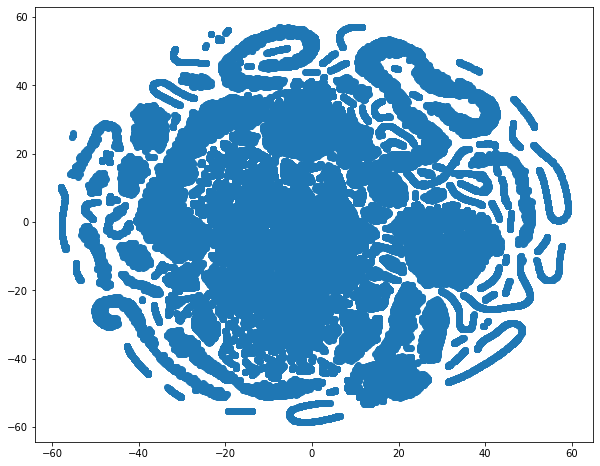

In [423]:
# NN = 100.000
# print the matrix by features

plt.figure(num=1, figsize=(10,8))

plt.scatter(tsne_100000_Random.embedding_[:, 0], tsne_100000_Random.embedding_[:, 1]);

Text(0.5, 1.0, 'Random 100,000. t-SNE projection')

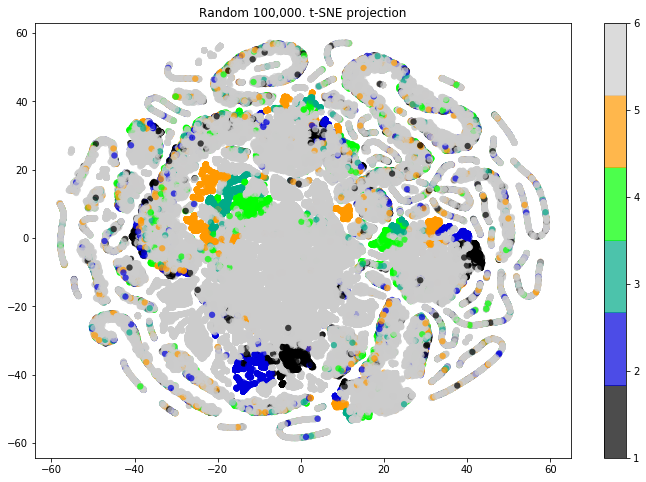

In [425]:
plt.figure(num=1, figsize=(12,8))
plt.scatter(tsne_100000_Random.embedding_[:, 0], tsne_100000_Random.embedding_[:, 1], 
            c=Y9, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('Random 100,000. t-SNE projection')

Text(0.5, 1.0, 'Random 100,000. t-SNE projection')

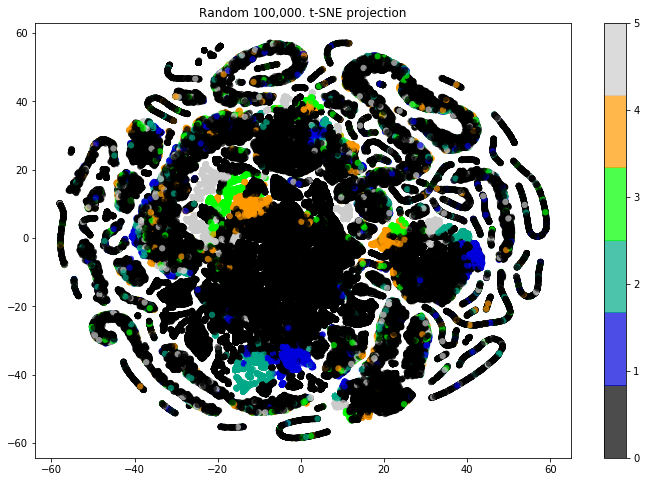

In [451]:
plt.figure(num=1, figsize=(12,8))
plt.scatter(tsne_100000_Random.embedding_[:, 0], tsne_100000_Random.embedding_[:, 1], 
            c=Y9, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('Random 100,000. t-SNE projection')